# ML HW 2
## By Niral Shah
## 02/07/18

In [214]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

## Problem 1

In [686]:
def predict(data,labels, w):    
    count = 0
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    
    N = len(labels)
    for i in range(0,N):
        x = data[i]
        y = labels[i]
        if(y*np.matmul(np.transpose(w), x)<=0):
            if(y==1):
                fn+=1;
            else:
                fp+=1;
            count+=1;
        else:
            if(y==1):
                tp+=1;
            else:
                tn+=1;
    return (count,tp,fp,tn,fn)

def perceptron(data,labels,w = np.zeros((2)),I = 50):
    N = len(labels)
    acc = np.zeros((1))
    epochs = I
    updates =0
    for e in range(1,I+1):
        metrics = predict(data,labels,w)[0]
        acc = np.resize(acc,(e))
        acc[e-1]=(1-(metrics)/float(N))
        for i in range(0,N):
            y = labels[i]
            x = data[i]
            if(y*np.matmul(np.transpose(w), x)<=0):
                w = w + y*x
                updates+=1
            else:
                if(epochs == I and acc[e-1] >=0.999):
                    print "Converges at epoch: "+ str(e)
                    return (w,acc,e,updates)   
    return (w,acc,e,updates)            

In [687]:
# Setup data
x = np.zeros(shape=(7,2))  # data
y = np.zeros((7))  # label
w = np.zeros((2)) #weight vector (no bias)
x[0] = [0.75,0.10]; y[0] = -1;
x[1] = [0.85,0.80]; y[1] = -1;
x[3] = [0.15,0.10]; y[3] = -1;
x[6] = [0.85,0.25]; y[6] = -1;


x[2] = [0.85,0.95]; y[2] = 1;
x[4] = [0.05,0.25]; y[4] = 1;
x[5] = [0.05,0.50]; y[5] = 1;

### Problem 1a)
How many iterations does Perceptron Algorithm take to converge? What is the error? 

In [688]:
retvals = perceptron(x,y,w)
print "Number of Iterations to converge:" + str(retvals[3])

Converges at epoch: 3
Number of Iterations to converge:7


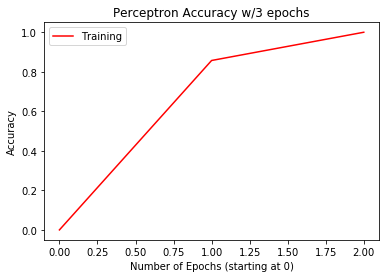

weight vector:[-1.05  1.1 ]
Error:0.0


In [7]:
# Plot the Perceptron Convergence Graph:
I = retvals[2]
acc_val = retvals[1]
ep = np.arange(0,I)
fig, ax = plt.subplots()
ax.plot(ep,acc_val,'r',label='Training')
legend = ax.legend()
ax.set_yticks(np.linspace(0,1,0.05),minor=True)
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs (starting at 0)')
plt.title('Perceptron Accuracy w/'+str(I)+' epochs')
plt.show()
print "weight vector:" + str(retvals[0])
print "Error:" + str(1-acc_val[-1])

### Problem 1a  (cont'd) 
Plot observed data, decision boundary, other decision boundaries that have the same error. 

In [689]:
# This section builds functions for plotting: 

w = retvals[0] # the hyper plane from perceptron
m1 = w[0] #x1 value from weight vector
m2 = w[1] #x2 value from weight vector 

f = lambda a : (-1*m1*a)/float(m2) #combine weight vector for function of hyperplane
f2 = lambda a : (0.95/0.85)*a # the upper bound of the hyperplane is at the point (0.85,0.95) (y=1)

sqrt = np.vectorize(math.sqrt) # The 3 point line
f3 = lambda a: sqrt(a) 

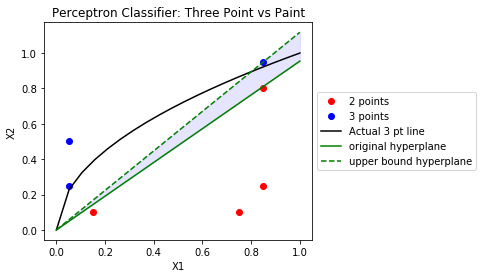

In [690]:
# Plot the Linear Classifier Hyperplane, upperbound and points;
fig, ax = plt.subplots()
x0 = x[y[:]==-1]
y0 = y[y[:]==-1]

x1 = x[y[:]==1]
y1 = y[y[:]==1]

xval = np.linspace(0,1,20)

ax.plot(x0[:,0], x0[:,1], 'ro',label='2 points')
ax.plot(x1[:,0],x1[:,1],'bo',label='3 points')
ax.plot(xval,f3(xval),'k', label='Actual 3 pt line')
ax.plot(xval,f(xval),'g-',label='original hyperplane')
ax.plot(xval,f2(xval),'g--',label='upper bound hyperplane')
ax.fill_between(xval, f(xval), f2(xval), color='blue', alpha='0.1')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Perceptron Classifier: Three Point vs Paint')
plt.show()

In [10]:
(-1*m1)/float(m2) 

0.9545454545454547

In [11]:
(0.95)/float(0.85) 

1.1176470588235294

The blue shaded area between the solid green line and the dashed green line represents all the possible decisions boundaries that could seperate the points with the same error. The slope of the hyperplane that seperates this data perfectly and goes through the origin ranges from 0.9545 to 1.1176.

### Problem 1b:


In [691]:
# Calculate Impurity:
def impurity(data,labels):
    if len(labels)==0:
        return 0
    else:
        pos = (len(data[labels[:]==1]))/float(len(labels))
        I = 2*pos*(1-pos)
        return I

In [692]:
# Calculate Change in Gini
def calc_gini(data,labels):
    N= float(data.shape[0])
    if(N!=0):
        p = len(labels[labels[:]==1])
        p= p/N
        return p*(1-p)
    else:
        return -1

#Total Gini Reduction
def changeInGini(I,data,labels,decide):  
    N= float(data.shape[0])
    
    pos_data = data[decide(data,1)]
    neg_data = data[decide(data,-1)]
    
    pos_labels = labels[decide(data,1)]
    neg_labels= labels[decide(data,-1)]
    
    pos = (pos_data.shape[0])/N
    neg = (neg_data.shape[0])/N
    
    pg = calc_gini(pos_data,pos_labels)
    pg = pos*pg
    
    ng = calc_gini(neg_data,neg_labels)
    ng = neg*ng
    
    deltaG = I - (pg + ng)
 
    return deltaG

In [14]:
def determine_best_split(x,y,decideX1,decideX2):
    I = impurity(x,y)
    if I !=0:
        max_val = -1
        split_val = -1
        best_index = -1

        for i in range(0,x.shape[1]):  
            if i==0:
                split_val = changeInGini(I,x[:,i],y,decideX1)
                if(split_val>max_val):
                    max_val = split_val
                    best_index =i
            else:
                split_val = changeInGini(I,x[:,i],y,decideX2)
                if(split_val>=max_val):
                    max_val = split_val
                    best_index =i
        return (best_index,split_val)
    else:
        return (-1,-1) #indicating its a leaf

In [693]:
# Helper method to partition the data set (as a tree split would)
def partition(data,f_idx,labels,decide):
    pos_data = data[decide(data[:,f_idx],1)]
    neg_data = data[decide(data[:,f_idx],-1)]
    
    pos_labels = labels[decide(data[:,f_idx],1)]
    neg_labels= labels[decide(data[:,f_idx],-1)]
    
    return (pos_data,pos_labels, neg_data,neg_labels)

In [694]:
# Threshold Functions for X1 and X2
qX1 = lambda d,v: d[:]<0.1 if v==1 else d[:]>=0.1
qX2 = lambda d,v: d[:]>=0.9 if v==1 else d[:]<0.9
questions = [qX1,qX2]

### Problem 1b: 

The following sections shows how a decision tree was grown manually (without third party libraries) using gini reduction:

### I.  Split 1 (Root): 
First decide which criteria to split on X1<0.1 or X2>=0.9 (These classifiers were determined based on approximations from the data)

In [17]:
split_dec = determine_best_split(x,y,questions[0],questions[1]) # (criteria to split on, gini_gain)

In [18]:
retvals = partition(x,split_dec[0],y,questions[split_dec[0]]) 

In [19]:
true_branch = (retvals[0],retvals[1])
false_branch = (retvals[2],retvals[3]) 


print "Root: (split on X1<0.1)"
print "True Branch (count:"+str(len(true_branch[1]))+"), impurity:"+ str(impurity(true_branch[0],true_branch[1]))
print "False Branch (count:"+str(len(false_branch[1]))+"), impurity:"+ str(impurity(false_branch[0],false_branch[1]))

Root: (split on X1<0.1)
True Branch (count:2), impurity:0.0
False Branch (count:5), impurity:0.32


### II. Split 2: 
Since the true branch has an impurity of 0, no further splitting is necessary for that branch. Thus we can focus on determining the best split for the false branch (again considering the same two criteria)

In [22]:
split_dec = determine_best_split(false_branch[0], false_branch[1],questions[0],questions[1])

In [23]:
retvals = partition(false_branch[0],split_dec[0],false_branch[1],questions[split_dec[0]])  #split on false branch

In [24]:
true_branch2 = (retvals[0],retvals[1])
false_branch2 = (retvals[2],retvals[3])

print "Split 2: (split on X2>=0.9)"
print "True Branch (count:"+str(len(true_branch2[1]))+"), impurity:"+ str(impurity(true_branch2[0],true_branch2[1]))
print "False Branch (count:"+str(len(false_branch2[1]))+"), impurity:"+ str(impurity(false_branch2[0],false_branch2[1]))

Split 2: (split on X2>=0.9)
True Branch (count:1), impurity:0.0
False Branch (count:4), impurity:0.0


### Decision Tree Visualization

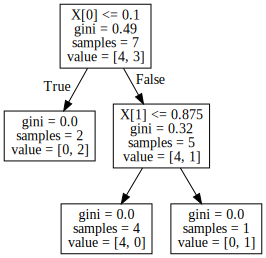

In [695]:
# Double Check: Verify Gini Reduction Algorithm with sklearn:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz 
clf_gini = DecisionTreeClassifier()
clf_gini.fit(x,y)

dot_data = tree.export_graphviz(clf_gini, out_file=None)
graph = graphviz.Source(dot_data)
graph

### IV. Find Other Thresholds that have the same error

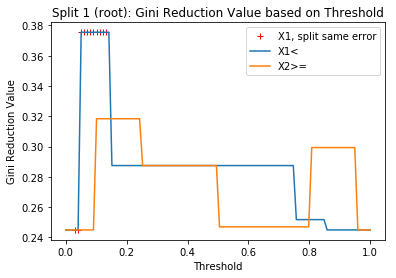

In [716]:
# Goal: Maximize Reduction in Gini Index: 
# Thus lets find criteria that does that:

#Split 1:

x1_splitCriteria = np.zeros((100))
x2_splitCriteria = np.zeros((100))
count =0
I = impurity(x,y)
criteria = np.linspace(0,1,100)
for C in criteria:
    
    q_X1 = lambda d,v: d[:]<C if v==1 else d[:]>=C
    q_X2 = lambda d,v: d[:]>=C if v==1 else d[:]<C
    x1_splitCriteria[count] = changeInGini(I,x[:,0],y,q_X1)
    x2_splitCriteria[count] = changeInGini(I,x[:,1],y,q_X2)
    count+=1
    
fig, ax = plt.subplots()  
ax.plot(criteria[3:14],x1_splitCriteria[3:14],'r+',label='X1, split same error')
ax.plot(criteria,x1_splitCriteria, label='X1<')
ax.plot(criteria,x2_splitCriteria, label='X2>=')
legend = ax.legend()
plt.title('Split 1 (root): Gini Reduction Value based on Threshold')
plt.xlabel('Threshold')
plt.ylabel('Gini Reduction Value')
plt.show()

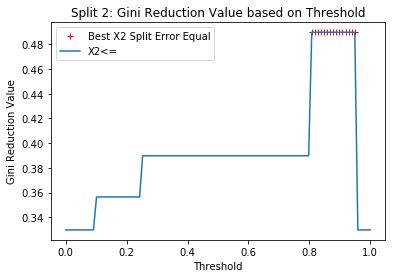

Best Split value for X2>0.808080808081


In [733]:
# Split 2: (we don't look at X1 because we've already split on that attribute)
x1_splitCriteria = np.zeros((100))
x2_splitCriteria = np.zeros((100))
count =0
I = impurity(x,y)
criteria = np.linspace(0,1,100)
for C in criteria:
    
    q_X1 = lambda d,v: d[:]<C if v==1 else d[:]>=C
    q_X2 = lambda d,v: d[:]>=C if v==1 else d[:]<C
    x2_splitCriteria[count] = changeInGini(I,false_branch[0][:,1],false_branch[1],q_X2)
    count+=1
fig, ax = plt.subplots()  
ax.plot(criteria[80:95],x2_splitCriteria[80:95],'r+', label='Best X2 Split Error Equal')
ax.plot(criteria,x2_splitCriteria, label='X2<=')
legend = ax.legend()
plt.title('Split 2: Gini Reduction Value based on Threshold')
plt.xlabel('Threshold')
plt.ylabel('Gini Reduction Value')
plt.show()

print "Best Split value for X2>" + str(criteria[x2_splitCriteria.argmax()])

### Problem 1c: Calculating Minimum Empircal Loss (Linear)

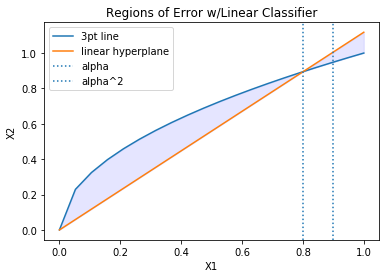

In [787]:
f2 = lambda a : (0.95/0.85)*a # the upper bound of the hyperplane is at the point (0.85,0.95) (y=1)
f2 = np.vectorize(f2)

fig, ax = plt.subplots() 
ax.plot(xval,f3(xval),label='3pt line')
ax.plot(xval,f2(xval),label='linear hyperplane')
ax.axvline(x=0.8,linestyle='dotted', label='alpha')
ax.axvline(x=0.9,linestyle='dotted',label='alpha^2')
legend = ax.legend()
plt.fill_between(xval, f3(xval), f2(xval), color='blue', alpha='0.1')
plt.title('Regions of Error w/Linear Classifier')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

#### Explanation: 
The graph above shows the 3 areas that need to be minimized. The goal is to find the sloepe value of $ \alpha$ that minimizes the area under the curve. 

Equation: 

$$\frac{\partial}{\partial a} ( \int_{0}^{1/\alpha^2} {\sqrt{x}} - {\alpha x}  dx + \int_{1/\alpha^2}^{1/\alpha} {\alpha x}-{\sqrt{x}} dx  + \int_{1/\alpha}^{1} 1 - {\sqrt{x}} dx  ) = 0 $$
$$ \vdots $$
$$ \vdots $$
$$ \alpha = \sqrt{2} $$

The ideal $ \alpha $ tha minimizes empirical error is $ \sqrt{2} $

## ------------------------------------------------------------------------------------------------
### Problem 1d: Calculating Minimum Empircal Loss (Decision Trees)

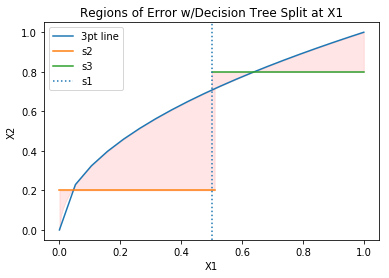

In [786]:
f2 = lambda a : (0.95/0.85)*0 # the upper bound of the hyperplane is at the point (0.85,0.95) (y=1)
f2 = np.vectorize(f2)

xsplit2 = np.linspace(0,0.51,100)
f_split2 = lambda a : 0.2 # the upper bound of the hyperplane is at the point (0.85,0.95) (y=1)
f_split2 = np.vectorize(f_split2)

xsplit3 = np.linspace(0.5,1,100)
f_split3 = lambda a : 0.8 # the upper bound of the hyperplane is at the point (0.85,0.95) (y=1)
f_split3 = np.vectorize(f_split3)

fig, ax = plt.subplots() 
ax.plot(xval,f3(xval),label='3pt line')
ax.plot(xsplit2,f_split2(xsplit2),label='s2')
ax.plot(xsplit3,f_split3(xsplit3),label='s3')

ax.axvline(x=0.5,linestyle='dotted', label='s1')

legend = ax.legend()
plt.fill_between(xsplit2, f_split2(xsplit2), f3(xsplit2), color='red', alpha='0.1')
plt.fill_between(xsplit3, f_split3(xsplit3), f3(xsplit3), color='red', alpha='0.1')
plt.title('Regions of Error w/Decision Tree Split at X1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

#### Explanation: 
The graph above shows the 4 areas that need to be minimized. The goal is to find the sloepe value of $ \alpha$ that minimizes the area under the curve. 

Area under the Curve: 

$$\int_{0}^{s_2^2} {s_2} - {\sqrt{x}}  dx + \int_{s_2^2}^{s_1} {\sqrt{x}} - {s_2} dx  + \int_{s_1}^{s_3^2} {s_3}-{\sqrt{x}} dx + \int_{s_3^2}^{1} {\sqrt{x}} - {s_3} dx $$
$$ \vdots $$
$$ \vdots $$

Now set up a system of equations to solve for $s_1$, $s_2$, $s_3$ : 

$$\frac{\partial}{\partial s_1} (\int_{0}^{s_2^2} {s_2} - {\sqrt{x}}  dx + \int_{s_2^2}^{s_1} {\sqrt{x}} - {s_2} dx  + \int_{s_1}^{s_3^2} {s_3}-{\sqrt{x}} dx + \int_{s_3^2}^{1} {\sqrt{x}} - {s_3} dx ) = 0$$
$$ \vdots $$
$$\frac{\partial}{\partial s_2} (\int_{0}^{s_2^2} {s_2} - {\sqrt{x}}  dx + \int_{s_2^2}^{s_1} {\sqrt{x}} - {s_2} dx  + \int_{s_1}^{s_3^2} {s_3}-{\sqrt{x}} dx + \int_{s_3^2}^{1} {\sqrt{x}} - {s_3} dx ) = 0$$
$$ \vdots $$
$$\frac{\partial}{\partial s_3} (\int_{0}^{s_2^2} {s_2} - {\sqrt{x}}  dx + \int_{s_2^2}^{s_1} {\sqrt{x}} - {s_2} dx  + \int_{s_1}^{s_3^2} {s_3}-{\sqrt{x}} dx + \int_{s_3^2}^{1} {\sqrt{x}} - {s_3} dx ) = 0$$


After solving the 3 partial derivatives as a system of equations the following result was found:

The minimum value for $ s_1 $ = $1/8$

The minimum value for $ s_2 $ = $1/4$

The minimum value for $ s_3 $ = $3/4$

### Problem 1d, part 2: 

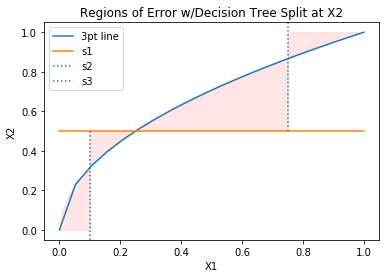

In [816]:
f2 = lambda a : (0.95/0.85)*0 # the upper bound of the hyperplane is at the point (0.85,0.95) (y=1)
f2 = np.vectorize(f2)

xsplit2 = np.linspace(0,0.51,100)
f_split2 = lambda a : 0.5 # the upper bound of the hyperplane is at the point (0.85,0.95) (y=1)
f_split2 = np.vectorize(f_split2)

xsplit3 = np.linspace(0.5,1,100)
f_split3 = lambda a : 0.8 # the upper bound of the hyperplane is at the point (0.85,0.95) (y=1)
f_split3 = np.vectorize(f_split3)

fig, ax = plt.subplots() 
ax.plot(xval,f3(xval),label='3pt line')
ax.plot(xval,f_split2(xval),label='s1')


ax.axvline(x=0.1,linestyle='dotted', ymax=0.5, label='s2')
s2split = np.ones(100)
s2split *=0.1
s2splity = np.linspace(0,1,100)
xsplit2 = np.linspace(0.1,0.25,100)

s3split = np.ones(100)
s3split *=0.75
s3splity = np.linspace(0,1,100)


ax.axvline(x=0.75,linestyle='dotted',ymin=0.5, label='s3')

legend = ax.legend()
plt.fill_between(xsplit2, f_split2(xsplit2), f3(xsplit2), color='red', alpha='0.1')
xsplit2 = np.linspace(0,0.1,100)
plt.fill_between(xsplit2, np.zeros((100)), f3(xsplit2), color='red', alpha='0.1')
xsplit2 = np.linspace(0.25,0.75,100)
plt.fill_between(xsplit2, f_split2(xsplit2), f3(xsplit2), color='red', alpha='0.1')
xsplit2 = np.linspace(0.75,1,100)
plt.fill_between(xsplit2, np.ones((100)), f3(xsplit2), color='red', alpha='0.1')
plt.title('Regions of Error w/Decision Tree Split at X2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

#### Explanation: 
The graph above shows the 4 areas that need to be minimized. The goal is to find the sloepe value of $ \alpha$ that minimizes the area under the curve. 

Area under the Curve: 

$$\int_{0}^{s_2^2} {\sqrt{x}}  dx + \int_{s_2}^{s_1^2} {s_1} - {\sqrt{x}} dx  + \int_{s_1^2}^{s_3} {\sqrt{x}}-{s_1} dx + \int_{s_3}^{1} {1} - {\sqrt{x}} dx $$
$$ \vdots $$
$$ \vdots $$

Now set up a system of equations to solve for $s_1$, $s_2$, $s_3$ : 

$$\frac{\partial}{\partial s_1} (\int_{0}^{s_2^2} {\sqrt{x}}  dx + \int_{s_2}^{s_1^2} {s_1} - {\sqrt{x}} dx  + \int_{s_1^2}^{s_3} {\sqrt{x}}-{s_1} dx + \int_{s_3}^{1} {1} - {\sqrt{x}} dx) = 0$$
$$ \vdots $$
$$\frac{\partial}{\partial s_2} (\int_{0}^{s_2^2} {\sqrt{x}}  dx + \int_{s_2}^{s_1^2} {s_1} - {\sqrt{x}} dx  + \int_{s_1^2}^{s_3} {\sqrt{x}}-{s_1} dx + \int_{s_3}^{1} {1} - {\sqrt{x}} dx) = 0$$
$$ \vdots $$
$$\frac{\partial}{\partial s_3} (\int_{0}^{s_2^2} {\sqrt{x}}  dx + \int_{s_2}^{s_1^2} {s_1} - {\sqrt{x}} dx  + \int_{s_1^2}^{s_3} {\sqrt{x}}-{s_1} dx + \int_{s_3}^{1} {1} - {\sqrt{x}} dx) = 0$$


After solving the 3 partial derivatives as a system of equations the following result was found:

The minimum value for $ s_1 $ $ \approx$ $0.6076$

The minimum value for $ s_1 $ $ \approx$ $0.1519$

The minimum value for $ s_1 $ $ \approx$ $0.64609$


### Problems 1e-f: 
#### Transforming variables to minimize true risk 

Let's try transforming the variable by setting ${X_1}$ $ =  \sqrt {X_1}$

In [28]:
tx=x
tx[:,0]=sqrt(tx[:,0])

In [29]:
retvals = perceptron(tx,y)

15


In [30]:
w_t = retvals[0]

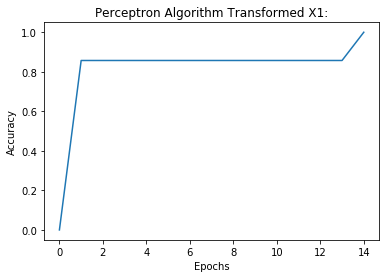

In [58]:
plt.plot(retvals[1])
plt.title('Perceptron Algorithm Transformed X1:')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

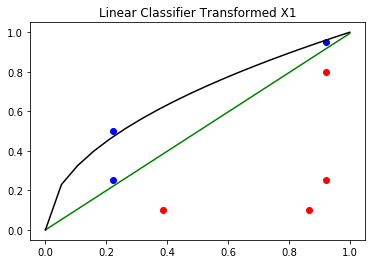

In [61]:
w_t = retvals[0]
m1 = w_t[0]
m2 = w_t[1]

f_t = lambda a : (-1*m1*a)/float(m2) 

fig, ax = plt.subplots()
ax.plot(sqrt(x0[:,0]),x0[:,1],'ro')
ax.plot(sqrt(x1[:,0]),x1[:,1],'bo')
ax.plot(xval,f_t(xval),'g-',label='original hyperplane')
ax.plot(xval,f3(xval),'k', label='Actual 3 pt line')
plt.title('Linear Classifier Transformed X1')
plt.show()

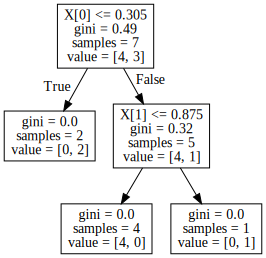

In [47]:
# Build a decision tree on transformed data
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz 
clf_gini = DecisionTreeClassifier()
clf_gini.fit(tx,y)

dot_data = tree.export_graphviz(clf_gini, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [35]:
from scipy import integrate

### Problem 1e: Transforming variables minimize true risk linear classifier 

For this problem it was realized that taking the sqrt of variable X1 minimized the true risk. Thus this transformation was applied.

In [818]:
intersection_pt = 1/((-m1/float(m2))**2) # the intersection of sqrt(x)=linear classifier is  where x = 1/m^2
r,err = integrate.quad(f3,0,intersection_pt)
r2,err = integrate.quad(f_t,0,intersection_pt)
true_risk_transformed = r-r2
print "The minimized True Risk: " + str(true_risk_transformed)

The minimized True Risk: 0.191627973941


### Problem 1f: Transforming variables minimize true risk decision tree
Can the decision tree obtain an error as good as or better than the linear classifier?

In [48]:
f_l = lambda x: 0.875

In [49]:
intersection_pt = float(sqrt(0.935))
r,err = integrate.quad(f_l,0.305,intersection_pt)

In [50]:
intersection_pt = float(sqrt(0.935))
r2,err = integrate.quad(f3,0.305,intersection_pt)

In [51]:
first_err_region = r-r2

In [52]:
intersection_pt = float(sqrt(0.935))
r,err = integrate.quad(f_l,intersection_pt,1)

intersection_pt = float(sqrt(0.935))
r2,err = integrate.quad(f3,intersection_pt,1)

In [53]:
second_err_region = r2-r

In [54]:
error_tree= first_err_region + second_err_region

In [55]:
print "Decision Tree True Risk Error: "+ str(error_tree)

Decision Tree True Risk Error: 0.0614652770347


Since the error of the tree is 0.0614, it is safe to say that the decision tree can achieve the same error as the linear classifier of 0.16954. 

### Problem 1h:  Classify the Paint

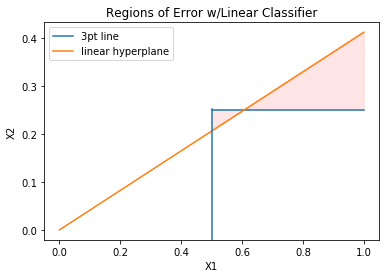

In [842]:
f2 = lambda a : (0.35/0.85)*a # the upper bound of the hyperplane is at the point (0.85,0.95) (y=1)
f2 = np.vectorize(f2)

paint = np.linspace(0.5,1,100)
fP = lambda a : 0.25 # the upper bound of the hyperplane is at the point (0.85,0.95) (y=1)
fP = np.vectorize(fP)

fig, ax = plt.subplots() 
ax.plot(paint,fP(paint),label='3pt line')
ax.plot(xval,f2(xval),label='linear hyperplane')
ax.axvline(x=0.5, ymax=0.6)
legend = ax.legend()

plt.fill_between(paint, f2(paint), fP(paint), color='red', alpha='0.1')
plt.title('Regions of Error w/Linear Classifier')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

#### Explanation: 
The graph above shows the 2 areas that need to be minimized. The goal is to find the sloepe value of $ \alpha$ that minimizes the area under the curve. 

Equation: 

$$\frac{\partial}{\partial a} ( \int_{0.5}^{0.25/\alpha} 0.25 - {\sqrt{x}} dx + \int_{1}^{0.25/\alpha} {\alpha x}-{0.25} dx ) = 0 $$
$$ \vdots $$
$$ \vdots $$
$$ \alpha = 1/\sqrt{10} $$

The ideal $ \alpha $ tha minimizes empirical error is $ 1/\sqrt{10} $
$\alpha$ $\approx$ ${0.31623}$

### Problem 1i : Optimal depth 2 decision tree 

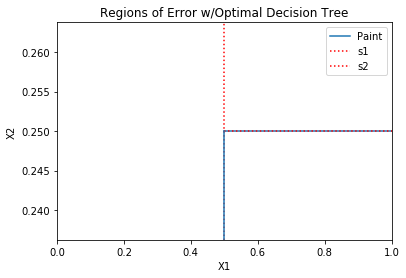

In [855]:

paint = np.linspace(0.5,1,100)
fP = lambda a : 0.25 # the upper bound of the hyperplane is at the point (0.85,0.95) (y=1)
fP = np.vectorize(fP)

fig, ax = plt.subplots() 
ax.plot(paint,fP(paint),label='Paint')
ax.axvline(x=0.5,label='s1', linestyle='dotted', color='red')
ax.axhline(y=0.25, xmin=0.5, label='s2',linestyle='dotted',color='red')
legend = ax.legend()
ax.axvline(x=0.5, ymax=0.5)
plt.xlim(0,1)

plt.title('Regions of Error w/Optimal Decision Tree')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

#### Explanation: 

The optimal decision tree is the one that will split on X1<0.5, and for values X1>=0.5, split a second time on X2<= 0.25. This will result in a decision tree with error 0. 

# Problem 2

In [863]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [864]:
train = pd.DataFrame.as_matrix(df_train)
test = pd.DataFrame.as_matrix(df_test)
fix_zeros = np.vectorize(lambda x: -1 if x==0 else x)

In [865]:
train[:,-1]=fix_zeros(train[:,-1])
test[:,-1]=fix_zeros(test[:,-1])

In [866]:
dat = train[:,0:-1]
lab = train[:,-1]

### Custom Methods (Code): 
The methods below were designed to calculate variable importance, surrogate split and growing a random forest. 

In [195]:
def maximizeSplit(data,labels):
    x1_splitCriteria = np.zeros(shape=(100,data.shape[1]))
    x2_splitCriteria = np.zeros(shape=(100,data.shape[1]))

    I = impurity(data,labels)
    criteria = np.linspace(0,1,100)
    
    for i in range(0,data.shape[1]): # iterate over columns
        count =0
        for C in criteria:
            q_L = lambda d,v: d[:]<=C if v==1 else d[:]>=C
            q_G = lambda d,v: d[:]>=C if v==1 else d[:]<C
            x1_splitCriteria[count,i] = changeInGini(I,data[:,i],labels,q_L)
            x2_splitCriteria[count,i] = changeInGini(I,data[:,i],labels,q_G)
            count+=1
    return (x1_splitCriteria,x2_splitCriteria, criteria)

In [212]:
def find_best_split_vars(x1_split_criteria, x2_split_criteria,criteria):

    variable_best_criteria = np.zeros(shape=(x1_split_criteria.shape[1],3))
    
    for i in range(0,x1_split_criteria.shape[1]):
        maxX1 = max(x1_split_criteria[:,i])
        maxX2 = max(x2_split_criteria[:,i])
        
        if (maxX1>=maxX2):
            C = criteria[np.argmax(x1_split_criteria[:,i])]
            variable_best_criteria[i]=[maxX1,C,0]
        else:
            C = criteria[np.argmax(x2_split_criteria[:,i])]
            variable_best_criteria[i]=[maxX2,C,1]
    return variable_best_criteria

In [218]:
def calc_best_giniReduction_each_var(data,labels):
    values = maximizeSplit(data,labels)
    return find_best_split_vars(values[0],values[1],values[2])

In [281]:
def calc_surrogate_split(data,labels,excl_ind,st): #excl_ind is the attribute to exclude
    N = float(data.shape[0])
    lam_vals = np.zeros((data.shape[1]))
    ffun = np.vectorize(lambda z,y: True if z & y else False)
    
    for i in range(0,data.shape[1]):
        if i != excl_ind:
            pL = len(data[:,i][data[:,i][:]<st])/N
            pR = len(data[:,i][data[:,i][:]<st])/N
            
            a = data[:,excl_ind][:]<st
            b=  data[:,i][:]<st
            PL = len(data[:,i][ffun(a,b)])/N
            
            c = data[:,excl_ind][:]>st
            d =  data[:,i][:]>st
            PR = len(data[:,i][ffun(c,d)])/N
            
            lam_vals[i] = (min(pL,pR)-(1-PL-PR))/(min(pL,pR))
        else:
            lam_vals[i] =-1*sys.float_info.max
    return lam_vals

In [384]:
def get_split_and_surrogate(data,labels):
        split_info = calc_best_giniReduction_each_var(data,labels)
        best_split_ind = np.argmax(split_info[:,0])
        
        lambda_vals = calc_surrogate_split(data,labels,best_split_ind,0.5)
        surrogate_split_ind = np.argmax(lambda_vals)
        
        Imp_best_split = split_info[:,0][best_split_ind]
        Imp_surr_split = split_info[:,0][surrogate_split_ind]
        
        best_split_info = [best_split_ind, Imp_best_split]
        surr_split_info = [surrogate_split_ind, Imp_surr_split]
        
        return (best_split_info,surr_split_info)

In [395]:
def variable_importance(K_features, best_split_info, surrogate_split_info):
    var_imp = np.zeros(K_features)
    
    best_split_ind = best_split_info[0]
    Imp_best_split = best_split_info[1]
    
    surrogate_split_ind = surrogate_split_info[0]
    Imp_surrsplit = surrogate_split_info[1]
    
    for i in range(0,len(var_imp)):
        if i == best_split_ind:
            var_imp[i]+=Imp_best_split
        elif i == surrogate_split_ind:
            var_imp[i]+=Imp_surr_split
    return var_imp

### Part 2a,  Calculating Variable Importance

In [875]:
split_info = get_split_and_surrogate(dat,lab) # This method returns the split and the surrogate variables
# Best Split X1
# Surrogate X2

In [857]:
var_imp = variable_importance(5,split_info[0],split_info[1])

#### Part 2a ii)

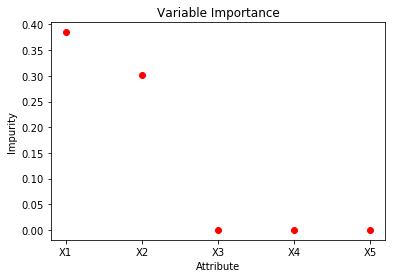

In [858]:
plt.plot(range(0,5),var_imp,'ro')
plt.xticks(range(5),('X1','X2','X3','X4','X5'))
plt.title('Variable Importance')
plt.ylabel('Impurity')
plt.xlabel('Attribute')
plt.show()

| Variable | Measure (Eq 3) |
|----------|----------------|
| X1       | 0.38483527     |
| X2       | 0.30245711     |
| X3       | N/A            |
| X4       | N/A            |
| X5       | N/A            |

#### Part 2a i) Decision Trees

#### Decision Tree Best Split

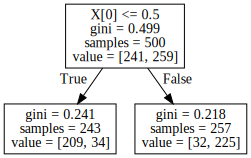

In [868]:
revert_zeros = np.vectorize(lambda x: 0 if x==-1 else x)
train[:,-1]=revert_zeros(train[:,-1])
test[:,-1]=revert_zeros(test[:,-1])

clf_gini = DecisionTreeClassifier(max_depth=1)
clf_gini.fit(train[:,0:5],train[:,-1])
dot_data = tree.export_graphviz(clf_gini, out_file=None)
graph = graphviz.Source(dot_data)
graph


#### Part 2a iii) Error for Best Split

In [869]:
mlsq_err = clf_gini.predict(test[:,0:-1])-test[:,-1]
mlsq_err = mlsq_err**2
error = (1/float(test.shape[0]))*sum(mlsq_err)
error

0.1

#### Part 2a i) Decision Tree Best Surrogate Split

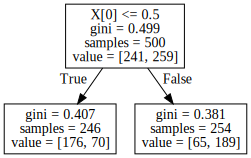

In [871]:
clf_gini = DecisionTreeClassifier(max_depth=1)
clf_gini.fit(train[:,1:5],train[:,-1])
dot_data = tree.export_graphviz(clf_gini, out_file=None)
graph = graphviz.Source(dot_data)
graph

#### Part 2a iii) Error for Surrogate Split

In [872]:
mlsq_err = clf_gini.predict(test[:,1:-1])-test[:,-1]
mlsq_err = mlsq_err**2
error = (1/float(test.shape[0]))*sum(mlsq_err)

In [873]:
error

0.27

### Problem 2b: 

In [548]:
def bootstrap(data,labels,B):
    samp = np.random.choice(data.shape[0],B,replace='True')
    s_d = data[samp]
    s_l = labels[samp]
    
    oob_samp = set(samp)
    oob_samp = set(np.arange(0,500))-oob_samp
    l = [v for v in oob_samp]
    oob_data = data[l]
    oob_labels = labels[l]
    
    return (s_d,s_l,oob_data,oob_labels)

In [525]:
def get_best_split_ind_k(data,labels, k_inds):
    split_info = calc_best_giniReduction_each_var(data,labels)
    best_split_ind = -1
    best_gini_red = -1
    for k in  k_inds:
        if (split_info[:,0][k] >best_gini_red):
                best_gini_red = split_info[:,0][k]
                best_split_ind = k
    return (best_split_ind,best_gini_red)

In [526]:
def get_best_surrogate_split_ind_k(data,labels, k_inds, excl_ind):
    split_info = calc_surrogate_split(data,labels,excl_ind, 0.5)
    best_split_ind = -1
    best_lam= -1*sys.float_info.max
    for k in  k_inds:
        if (split_info[k] >best_lam):
                best_lam = split_info[k]
                best_split_ind = k
    return (best_split_ind,best_lam)

### Problem 2b i:

In [564]:
def calc_lsq_err(data,labels,st):
    labels =revert_zeros(labels)
    predictor = np.vectorize(lambda x: 0 if x<=st else 1)
    diff = (predictor(data)-labels)**2
    mlsq = (diff.sum(axis=0))/float(len(labels))
    return mlsq    

In [594]:
from scipy import stats

In [878]:
count_best_split = np.zeros((5,5))
count_best_surr = np.zeros((5,5));
importance_var = np.zeros((5,5))
importance_oob = np.zeros((5,5))


data_test = test[:,0:-1]
test_label = revert_zeros(test[:,-1])
predictor = np.vectorize(lambda x: 0 if x<=0.5 else 1)

test_error= np.zeros((5))

avg_stump_err = np.zeros((5))

for k in range(1,6):
    votes = np.zeros((1000,len(test_label)))
    for m in range(0,1000):
        bs = bootstrap(dat,lab,400)
        oob_data = bs[2]
        oob_labels = bs[3]
        
        k_inds = np.random.choice(5, k, replace=False)
        best_split_info= get_best_split_ind_k(bs[0],bs[1], k_inds)
        bst_split_idx = best_split_info[0]
        bst_split_gini = best_split_info[1]
        
        count_best_split[k-1][bst_split_idx]+=1
        importance_var[k-1][bst_split_idx]+=bst_split_gini;
        
        error_t = calc_lsq_err(oob_data[:,bst_split_idx],oob_labels,0.5)
        oob_data_permuted = oob_data[:,bst_split_idx]
        oob_data_permuted = np.random.permutation(oob_data_permuted)
        
        error_t_perm = calc_lsq_err(oob_data_permuted,oob_labels, 0.5)
        votes[m]=predictor(data_test[:,bst_split_idx])

        Imp_oob = error_t_perm - error_t 
        importance_oob[k-1][bst_split_idx]+=Imp_oob
        avg_stump_err[k-1]+=calc_lsq_err(oob_data[:,bst_split_idx],oob_labels,0.5)
        
        if k !=1:
            best_surr_info = get_best_surrogate_split_ind_k(bs[0],bs[1],k_inds,bst_split_idx)
            bst_surr_idx = best_surr_info[0]
            count_best_surr[k-1][bst_surr_idx]+=1
    majority_vote = stats.mode(votes,axis=0)[0][0]
    diff = (majority_vote-test_label)**2
    mlsq = (diff.sum(axis=0))/float(len(test_label))
    test_error[k-1]=mlsq

In [616]:
count_best_split

array([[  207.,   165.,   185.,   224.,   219.],
       [  406.,   273.,   126.,   110.,    85.],
       [  613.,   288.,    32.,    39.,    28.],
       [  795.,   205.,     0.,     0.,     0.],
       [ 1000.,     0.,     0.,     0.,     0.]])

In [617]:
count_best_surr

array([[    0.,     0.,     0.,     0.,     0.],
       [    0.,   101.,   283.,   304.,   312.],
       [    0.,   326.,   449.,   183.,    42.],
       [    0.,   570.,   424.,     4.,     2.],
       [    0.,  1000.,     0.,     0.,     0.]])

#### Part 2b i: Summarize Best Split Counts:

| K 	|  X1  	|  X2 	| X3  	| X4  	| X5 	|
|---	|:----:	|:---:	|-----	|-----	|----	|
| 1 	| 207  	| 165 	| 185 	| 224 	| 0  	|
| 2 	| 406  	| 273 	| 126 	| 110 	| 0  	|
| 3 	| 613  	| 288 	| 32  	| 39  	| 0  	|
| 4 	| 795  	| 205 	| 0   	| 0   	| 0  	|
| 5 	| 1000 	| 0   	| 0   	| 0   	| 0  	|


#### Surrogate Split Counts:

| K 	| X1 	|  X2  	| X3  	| X4  	| X5  	|
|---	|:--:	|:----:	|-----	|-----	|-----	|
| 1 	| 0  	|    0 	| 0   	| 0   	| 0   	|
| 2 	| 0  	|  101 	| 283 	| 304 	| 312 	|
| 3 	| 0  	|  326 	| 449 	| 183 	| 42  	|
| 4 	| 0  	| 570  	| 424 	| 4   	| 2   	|
| 5 	| 0  	| 1000 	| 0   	| 0   	| 0   	|


Summary:

The tables suggest that X1 is the most important variable and that X2 is a helpful feature. The other features don't really help differentiate to determine the result. For the Best Splits count the dependence on K is revealed, as the bootstrap sample grows X1 is the unanmoiously the best split. This suggests that there is not any masking going on as the only times other variables are chosen to be the best split is when X1 may not be apart of the sample. 

### Problem 2b ii:

#### Equation 5 Calculations:

In [618]:
importance_var = importance_var/1000 # Equation 5

In [619]:
importance_var

array([[ 0.07958237,  0.04972432,  0.0462178 ,  0.05597934,  0.05471146],
       [ 0.15592776,  0.08237153,  0.03159458,  0.02753181,  0.02123894],
       [ 0.23503059,  0.08683887,  0.00801957,  0.0097875 ,  0.00701204],
       [ 0.305394  ,  0.06193933,  0.        ,  0.        ,  0.        ],
       [ 0.38432511,  0.        ,  0.        ,  0.        ,  0.        ]])

#### Note Table Above (Each Row is for K=1:5 and each column corresponds with X1:X5 

#### Equation 6 Calculations: (Out of Bag)

In [879]:
importance_oob = importance_oob/1000.0

In [881]:
np.set_printoptions(precision=3)

In [882]:
print(importance_oob)

[[  7.676e-02   4.641e-02   3.155e-03  -3.207e-03   7.894e-04]
 [  1.469e-01   7.113e-02   8.415e-04  -7.344e-04   2.854e-04]
 [  2.060e-01   7.381e-02   2.415e-05  -6.119e-04   5.096e-05]
 [  2.992e-01   4.232e-02   0.000e+00   0.000e+00   0.000e+00]
 [  3.674e-01   0.000e+00   0.000e+00   0.000e+00   0.000e+00]]


#### Note Table Above (Each Row is for K=1:5 and each column corresponds with X1:X5 

#### Summary: 

It appears using eqations 5 and 6 seems to reduce the visibility of potential masking going on. However the data continues to suggest taht X1 is the most important feature in the dataset and X2 appears to be the next best feature. As K increase the variable importance using both equation 5 and equation 6 for all variables besides X1 goes down. X1 grows in importance as the likelihood of it being included in a bootstrap sample increases. 

### Problem 2b iii:

#### Majority Vote:

In [622]:
test_error #Each row represents K 1-5

array([ 0.27,  0.15,  0.1 ,  0.1 ,  0.1 ])

#### Average Stump Error:

In [627]:
avg_stump_err = avg_stump_err/1000

In [628]:
avg_stump_err #Each row represents K 1-5

array([ 0.37930277,  0.28597317,  0.20576394,  0.15921849,  0.13183545])

#### 2b iii, Explanation: 

The correct way to measure random forest error is by computing the loss with majority vote. 

### Problem 2c:

In [883]:
count_best_split = np.zeros((5,5))
count_best_surr = np.zeros((5,5));
importance_var = np.zeros((5,5))
importance_oob = np.zeros((5,5))
std_dev_var = np.zeros((5,5))
std_dev_var_oob = np.zeros((5,5))

data_test = test[:,0:-1]

predictor = np.vectorize(lambda x: 0 if x<=0.5 else 1)


avg_stump_err = np.zeros((5))

b_vals = [0.4,0.5,0.6, 0.7, 0.8]

K=2
k=0
for B in b_vals:
    votes = np.zeros((1000,len(test_label)))
    importance_sum = np.zeros((1000,5))
    importance_oob_sum = np.zeros((1000,5))
    
    for m in range(0,1000):
        bs = bootstrap(dat,lab,B*500)
        oob_data = bs[2]
        oob_labels = bs[3]
        
        k_inds = np.random.choice(5, K, replace=False)
        best_split_info= get_best_split_ind_k(bs[0],bs[1], k_inds)
        bst_split_idx = best_split_info[0]
        bst_split_gini = best_split_info[1]
        
#         count_best_split[k-1][bst_split_idx]+=1
        importance_sum[m][bst_split_idx] +=bst_split_gini;
        
        error_t = calc_lsq_err(oob_data[:,bst_split_idx],oob_labels,0.5)
        oob_data_permuted = oob_data[:,bst_split_idx]
        oob_data_permuted = np.random.permutation(oob_data_permuted)
        error_t_perm = calc_lsq_err(oob_data_permuted,oob_labels, 0.5)
        Imp_oob = error_t_perm - error_t 
        importance_oob_sum[m][bst_split_idx]+=Imp_oob
        
#         votes[m]=predictor(data_test[:,bst_split_idx])
         #since K=2 
        best_surr_info = get_best_surrogate_split_ind_k(bs[0],bs[1],k_inds,bst_split_idx)
        bst_surr_idx = best_surr_info[0]
#         count_best_surr[k-1][bst_surr_idx]+=1
    
    importance_var[k-1]=np.sum(importance_sum,axis=0)
    importance_oob[k-1] = np.sum(importance_oob_sum,axis=0)
    std_dev_var[k-1] = np.std(importance_sum,axis=0)
    std_dev_var_oob[k-1] = np.std(importance_oob_sum,axis=0)
    k+=1

/Users/niralshah/anaconda/envs/capstone/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


### Problem 2c i:

In [887]:
np.set_printoptions(precision=3)

#### Equation 5:

In [884]:
importance_var = importance_var/1000

In [885]:
importance_var

array([[ 0.152,  0.088,  0.027,  0.027,  0.023],
       [ 0.154,  0.097,  0.021,  0.026,  0.024],
       [ 0.157,  0.095,  0.023,  0.024,  0.023],
       [ 0.168,  0.085,  0.025,  0.026,  0.019],
       [ 0.147,  0.097,  0.029,  0.026,  0.02 ]])

#### Note Table Above (Each row corresponds to B and each column corresponds with X1:X5 

#### Equation 6:

In [886]:
importance_oob = importance_oob/1000

In [888]:
importance_oob

array([[  1.451e-01,   6.739e-02,   1.110e-03,  -1.768e-03,   4.385e-05],
       [  1.459e-01,   7.341e-02,   8.413e-04,  -2.072e-03,   6.117e-04],
       [  1.500e-01,   7.239e-02,   6.446e-04,  -4.417e-04,   6.037e-04],
       [  1.608e-01,   6.492e-02,   8.996e-04,  -7.461e-04,  -2.289e-04],
       [  1.403e-01,   7.353e-02,   1.592e-03,  -1.328e-03,   3.972e-04]])

#### Note Table Above (Each row corresponds to B and each column corresponds with X1:X5 

#### Summary: 

The table indicates the X1 is the most important feature. An interesting thing to note is that as the number of bootstrap sample increases, the importance value appears to decrease for X1 and increase for all other variables (generally). 

### Problem 2c ii:

#### Note Tables Below (Each row corresponds to B and each column corresponds with X1:X5 

#### Std deviation using Equation 5

In [889]:
std_dev_var

array([[ 0.188,  0.137,  0.078,  0.078,  0.073],
       [ 0.188,  0.141,  0.069,  0.076,  0.073],
       [ 0.189,  0.141,  0.072,  0.074,  0.072],
       [ 0.191,  0.136,  0.074,  0.077,  0.067],
       [ 0.187,  0.141,  0.08 ,  0.076,  0.068]])

#### Std deviation using Equation 6

In [890]:
std_dev_var_oob

array([[ 0.18 ,  0.106,  0.012,  0.014,  0.011],
       [ 0.18 ,  0.109,  0.011,  0.014,  0.012],
       [ 0.182,  0.109,  0.012,  0.012,  0.011],
       [ 0.184,  0.106,  0.014,  0.013,  0.013],
       [ 0.179,  0.108,  0.012,  0.01 ,  0.009]])